In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from minisom import MiniSom
import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen

### Problem 1: Following the guidelines below, perform hierarchical clustering of the data from data_problem1.mat (or data_problem1.csv) in the space of first few eigenvectors (decide yourself how many modes to use). Guidelines: 
 
> a) Perform PCA on the data (the data has 57 variables and 672 observations in time) and decide how many modes to keep. [1 point for correct PCA, 1 point for a reasonable choice of modes to keep]. 
- done

> b) Perform hierarchical clustering with Ward's method on the data in the PC space of the modes you kept. Plot the dendrogram. [1 point for correct dendrogram]. 
- done
 
> c) Chose three possible options for the optimal number of clusters (k) and plot the results (clustered data in PC space) for those options. [1 point for the correct choices of k, 1 point for the plots] 
- done
 
> d) For only one of the cluster options above (on choice of k): plot, on the same graph, the mean pattern (57 variables) of each cluster (using the reconstructed data according to the selected number of PC modes). Plot the time-series (672 points) of occurrences of these clusters. [1 point for the mean patterns plot, 1 point for the time-series plot] 
 

## Read and Visualize Data

In [3]:
df = pd.read_csv('data_problem1.csv') 
df.head()

,0.036818,0.033539,0.033123,0.031278,0.027377,0.028032,0.027448,0.019291,0.015651,0.018746,...,-0.010522,-0.011755,-0.0087746,-0.014626,-0.01425,-0.010041,-0.011989,-0.010848,-0.0084769,-0.009893
0,0.037934,0.035672,0.035882,0.034613,0.028880,0.030547,0.028578,0.020841,0.018156,0.020476,...,-0.010327,-0.013257,-0.009106,-0.014099,-0.014199,-0.010395,-0.012208,-0.012134,-0.008271,-0.010787
1,0.036906,0.036274,0.036005,0.032552,0.029195,0.029762,0.028165,0.020784,0.018125,0.020316,...,-0.008911,-0.011393,-0.007514,-0.012794,-0.013724,-0.009944,-0.012043,-0.010992,-0.006561,-0.009772
2,0.037272,0.034683,0.033968,0.033477,0.029140,0.029770,0.028414,0.020798,0.017886,0.019230,...,-0.010230,-0.011868,-0.008203,-0.014116,-0.014222,-0.010861,-0.012120,-0.011890,-0.006713,-0.009719
3,0.038734,0.035793,0.036076,0.033213,0.028802,0.029976,0.028678,0.021032,0.017470,0.019707,...,-0.011022,-0.013147,-0.009171,-0.013735,-0.014227,-0.009927,-0.011541,-0.011711,-0.007242,-0.010617
4,0.036321,0.034543,0.033899,0.032573,0.028402,0.029044,0.027447,0.020391,0.016775,0.019175,...,-0.009324,-0.011068,-0.007338,-0.012780,-0.013651,-0.009053,-0.011295,-0.010506,-0.007452,-0.008108


## Perform PCA - I chose 3 modes

Fraction of variance explained: 95.91043890640523
Expected sizes:
	57 eigenvectors, each of length 57
	57 eigenvalues, one for each eigenvector
	57 PCs, each of length 671
Actual sizes:
	57 eigenvectors, each of length 57
	57 eigenvalues
	57 PCs, each of length 671


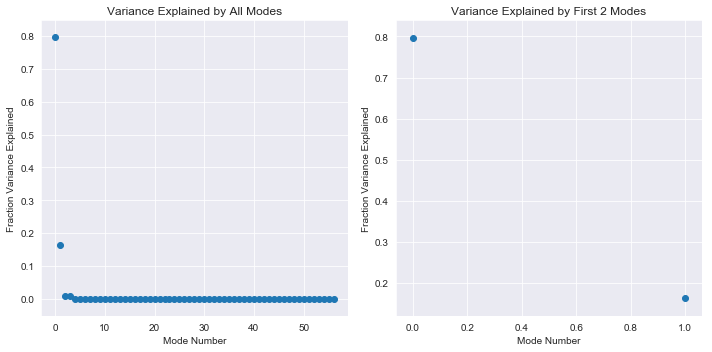

In [4]:
## We want to run PCA
n_modes = np.min(np.shape(df))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(df)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_



n=2
print('Fraction of variance explained: ' + str(np.sum(fracVar[:n])*100))  #sum of the first n modes = total percent variance explained by the first neigvecs
# print(np.shape(eigvecs))


#investigate: did PCA work as we expected?  What size of variables do we expect?
nObservations = np.shape(df)[0]
nVariables = np.shape(df)[1] 
print('Expected sizes:')
print('\t' + str(nVariables) + ' eigenvectors, each of length ' + str(nVariables))
print('\t' + str(nVariables) + ' eigenvalues, one for each eigenvector')
print('\t' + str(nVariables) + ' PCs, each of length ' + str(nObservations))
print('Actual sizes:')
print('\t' + str(np.shape(eigvecs)[0]) + ' eigenvectors, each of length ' + str(np.shape(eigvecs)[1]))
print('\t' + str(len(fracVar)) + ' eigenvalues')
print('\t' + str(np.shape(PCs)[1]) + ' PCs, each of length ' + str(np.shape(PCs)[0]))


sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = n
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

## Plot fraction of variance explained by each mode

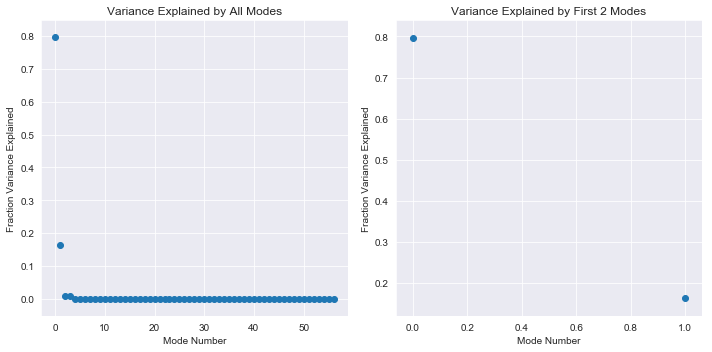

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = n
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

## Plot the first n modes and PCs

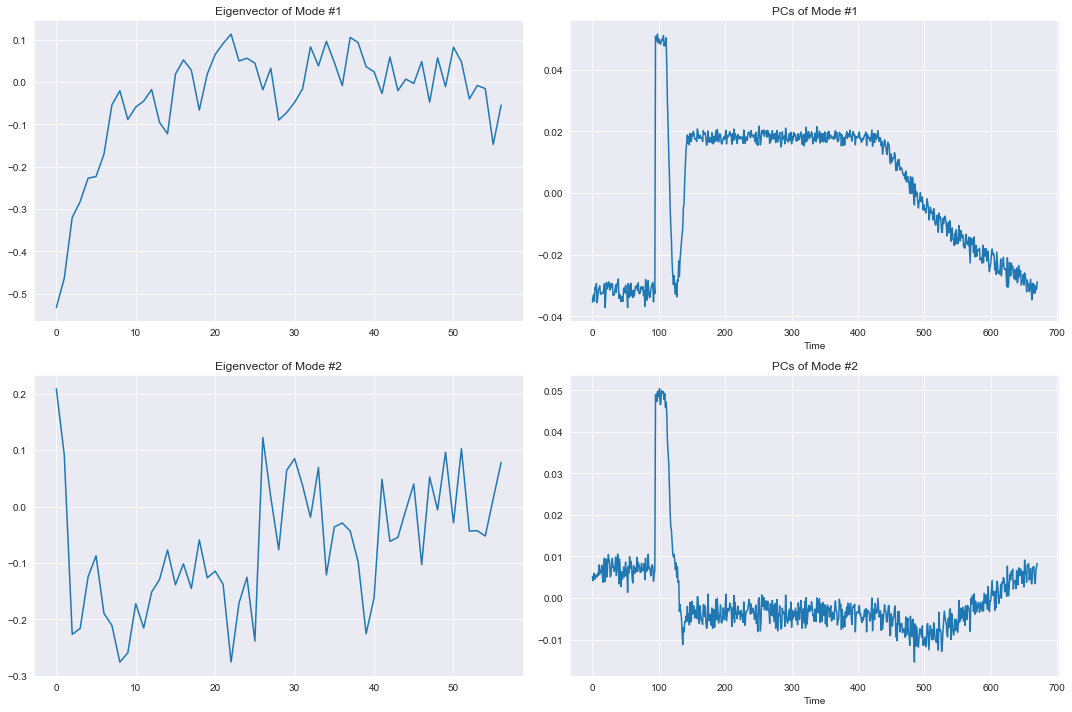

In [6]:
plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Time')
    
    plt.tight_layout()

## Create dendogram in the space of the first 2 PCs

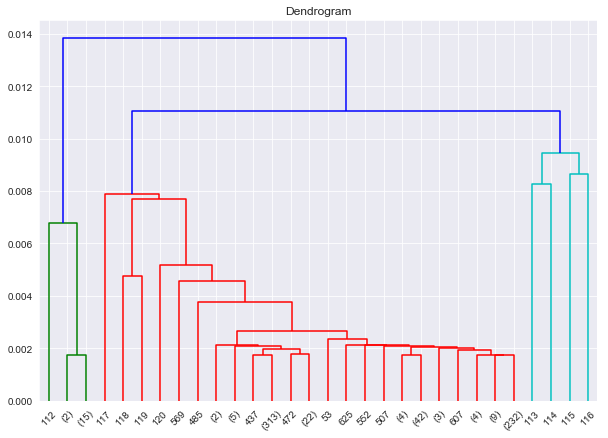

In [7]:
data = PCs[:,:2]
linked = linkage(data)

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=30)
plt.title('Dendrogram')
plt.show()

## Cluster and visualize for 2,3 and 4 clusters

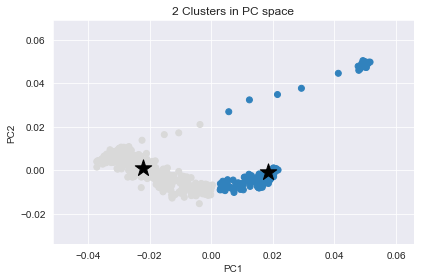

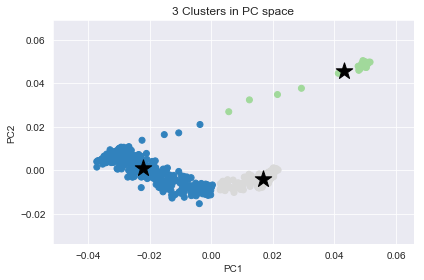

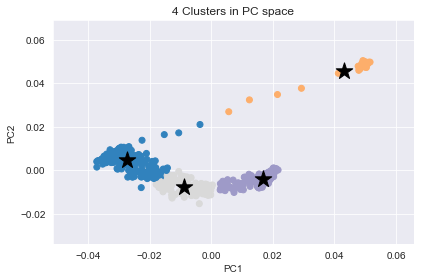

In [8]:
n_clusters = [2,3,4]
# sns.set_style('darkgrid')
for i in range(len(n_clusters)):
    
    cluster = AgglomerativeClustering(n_clusters=n_clusters[i], 
                                      affinity='euclidean', 
                                      linkage='ward')
    cn = cluster.fit_predict(data)

    #find mean pattern of each cluster
    cluster_pattern_PC = np.empty((n_clusters[i],np.shape(data)[1]))
    cluster_pattern = np.empty((n_clusters[i],np.shape(df)[1]))
    for cluster_num in range(n_clusters[i]):
        inds = np.argwhere(cn==cluster_num)
        cluster_pattern_PC[cluster_num,:] = np.mean(data[inds,:],axis=0)
        cluster_pattern[cluster_num,:] = np.mean(df.T[np.squeeze(inds)],axis=1)


    #visualized clustered data in PC-space
    plt.figure(figsize=(6,4))
    plt.scatter(PCs[:,0],PCs[:,1],c=cn,cmap='tab20c')
    plt.scatter(cluster_pattern_PC[:,0],cluster_pattern_PC[:,1],marker='*',c='k',s=300)
    plt.ylabel('PC2')
    plt.xlabel('PC1')
    plt.title(str(n_clusters[i]) + ' Clusters in PC space')

    plt.tight_layout()
    plt.show()

## TODO: RECONSTRUCT Mean pattern of the clusters

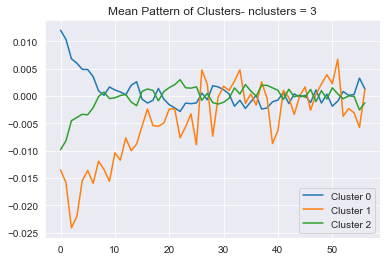

In [9]:
numModes = n
numObs = np.shape(df)[0]
data_rec = np.empty_like(df)
for kk in range(numObs): #for each glacier 
    this_glacier_rec = np.zeros_like(df.iloc[0,:])
    for mode in range(numModes):
        this_glacier_rec += eigvecs[mode,:]*PCs[kk,mode] 
    data_rec[kk,:] = this_glacier_rec
    
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data_rec)

#find mean pattern of each cluster
cluster_pattern = np.empty((n_clusters,np.shape(data_rec)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern[cluster_num,:] = np.mean(data_rec[inds,:],axis=0)
    
#visualize clusters

plt.plot(cluster_pattern.T)
plt.title('Mean Pattern of Clusters- nclusters = 3')
plt.legend(['Cluster ' + str(ii) for ii in range(n_clusters)])
plt.show()

## Plot the time-series (672 points) of occurrences of these clusters.

Text(0,0.5,'Cluster Number')

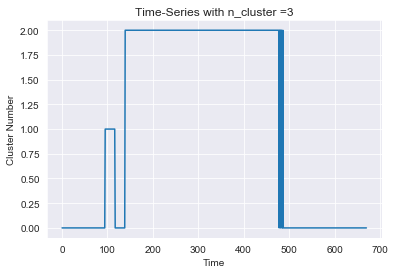

In [10]:
plt.plot(cn)
plt.title("Time-Series with n_cluster =3")
plt.xlabel("Time")
plt.ylabel("Cluster Number")

### Problem 2: Following the guidelines below, perform clustering using self-organizing maps from data_problem2.mat (or data_problem2.csv).  The data is made up of normalized seasonal streamflow from 194 rivers in Alberta, Canada (i.e. there are 194 stations, each with 365 days of normalized streamflow).  The locations of each station are given by a latitude/longitude coordinate pair in stationLon.mat and stationLat.mat (or stationLon.csv and stationLat.csv). 
 
> a) Perform clustering using a 3 x 2 SOM.  Plot the 6 SOM patterns.  Plot the locations of the stations, coloured according to the cluster to which they belong. What is the frequency of each cluster?  [1 point for correct SOM patterns, 1 point for map of clusters, 1 point for correct frequencies] 
    - done 

> b) Perform clustering a differently sized SOM, and plot the SOM patterns, locations of stations coloured by BMU, and frequency of each cluster as in a).  Discuss what you think are two key differences between your results from a) and b).  [1 point for plots, 2 points for discussion] 
    - done

> c) Calculate quantization error and topographic error for a range of SOM sizes (e.g.: 1x2, 2x2, 2x3, 3x3, 3x4, 4x4, 4x5, 5x5) and discuss what you find.  In what circumstance is it more important to minimize quantization error, versus in what circumstance is it more important to minimize topographic error? [1 point for discussion of QE and TE with map size, 1 point for discussion on circumstances to minimize QE/TE] 
    - done
 
> d) Calculate quantization error and topographic error for pairs of SOMs which have the same number of nodes but different map sizes and discuss what you find (e.g.: are QE and TE the same for a 2x3, 3x2 map, and 1x6 map?  A 3x4 and 4x3 map?  A 4x5 and 5x4 map? A 1x2 and 2x1 map?).  [1 point for identifying if QE/TE are the same for maps with the same number of nodes and different shape, 1 point for discussion]   
    - done

## Load data

In [11]:
#load in Alberta borders, station lat/lon, and flow data
ABlon = pd.read_csv('ABlon.csv',header = None)
ABlat = pd.read_csv('ABlat.csv',header = None)
stationLon = pd.read_csv('stationLon.csv')
stationLat = pd.read_csv('stationLat.csv')

df2 = pd.read_csv('data_problem2.csv')

## Visualize province + stations

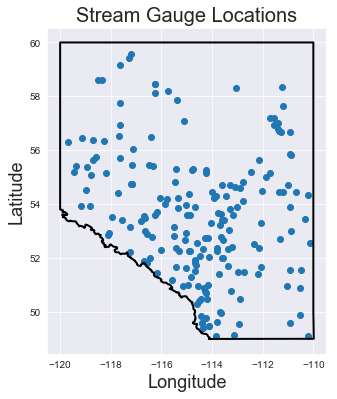

In [12]:
plt.figure(figsize = (5,6))
plt.plot(ABlon, ABlat, color = 'k', linewidth = 2)
plt.scatter(stationLon,stationLat)
plt.title('Stream Gauge Locations', fontsize = 20)
plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude', fontsize = 18)
plt.show()

## Create 3 by 2 SOM and map - terrain 

(193, 365)
193


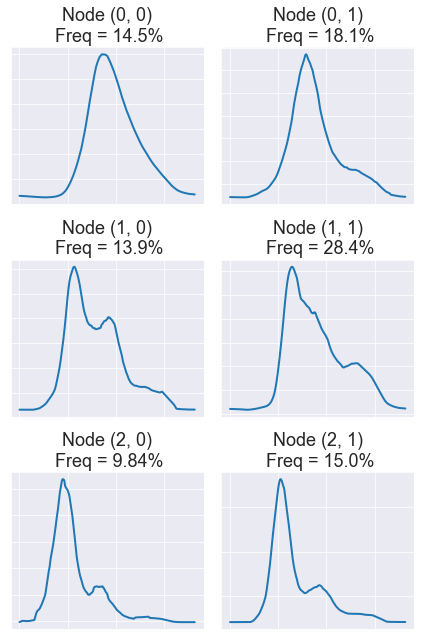

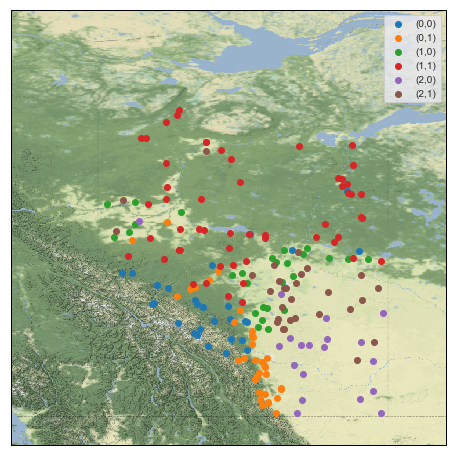

In [13]:
prob2 = pd.read_csv('data_problem2.csv')

#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 2
ny = 3

data = prob2.to_numpy()

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

print(qnt.shape)

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*ny + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))

print(len(bmus))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

#visualize
plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy], linewidth = 2)
    plt.title('Node ' + str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%', fontsize = 18)
    plt.tick_params(labelbottom = False, labelleft = False)
    
plt.tight_layout()




lats = pd.read_csv('stationLat.csv')
lons = pd.read_csv('stationLon.csv')
lats = lats.to_numpy()
lons = lons.to_numpy()

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
i = 0

for bmu in bmus:
    if bmu[1] == 0 and bmu[0] == 0:
        cluster1.append([lons[i],lats[i]])
    elif bmu[1] == 0 and bmu[0] == 1:
        cluster2.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 0:
        cluster3.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 1:
        cluster4.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 0:
        cluster5.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 1:
        cluster6.append([lons[i],lats[i]])
    i = i + 1

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
fig.add_axes(ax)

tiler = Stamen('terrain-background')
ax.add_image(tiler, 7)

ax.set_extent([-123, -108, 48, 63], crs=ccrs.PlateCarree())

ax.scatter(cluster1[:,0],cluster1[:,1],transform = ccrs.PlateCarree(), label = "(0,0)")
ax.scatter(cluster2[:,0],cluster2[:,1],transform = ccrs.PlateCarree(), label = "(0,1)")
ax.scatter(cluster3[:,0],cluster3[:,1],transform = ccrs.PlateCarree(), label = "(1,0)")
ax.scatter(cluster4[:,0],cluster4[:,1],transform = ccrs.PlateCarree(), label = "(1,1)")
ax.scatter(cluster5[:,0],cluster5[:,1],transform = ccrs.PlateCarree(), label = "(2,0)")
ax.scatter(cluster6[:,0],cluster6[:,1],transform = ccrs.PlateCarree(), label = "(2,1)")

ax.legend()



nx = 2
ny = 3

 #number of observations to use as input to the SOM
data = df2.to_numpy()
N = len(data)


#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
som.pca_weights_init(data)
som.train_random(data, 1000) # trains the SOM

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*ny + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=N

## Create 3 by 2 SOM and map - outline

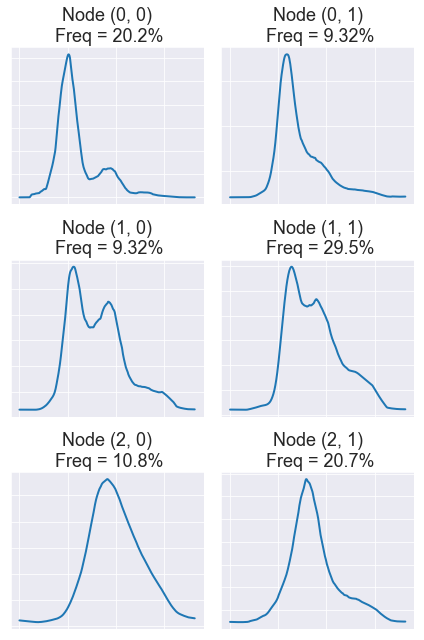

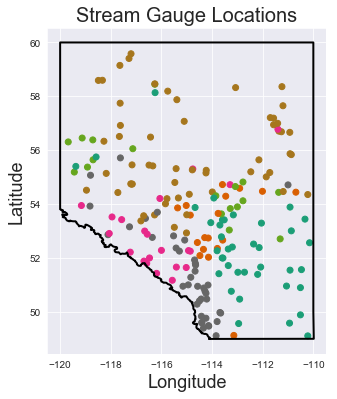

In [14]:
prob2 = pd.read_csv('data_problem2.csv')

#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 2
ny = 3

data = prob2.to_numpy()

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*ny + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

#visualize
plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy], linewidth = 2)
    plt.title('Node ' + str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%', fontsize = 18)
    plt.tick_params(labelbottom = False, labelleft = False)
    
plt.tight_layout()


B=np.reshape(bmus_num,(193,1))
plt.figure(figsize = (5,6))
plt.plot(ABlon, ABlat, color = 'k', linewidth = 2)
plt.scatter(stationLon,stationLat,c=B,cmap='Dark2')
plt.title('Stream Gauge Locations', fontsize = 20)
plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude', fontsize = 18)
plt.show()

## All clusters observed

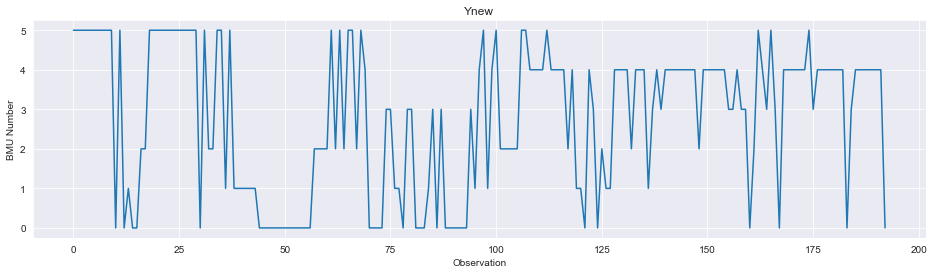

In [15]:
plt.figure(figsize=(16,4))
plt.plot(bmus_num)
plt.xlabel('Observation')
plt.ylabel('BMU Number')
plt.title('Ynew')
plt.show()

## Create 5 by 4 SOM and map - terrain

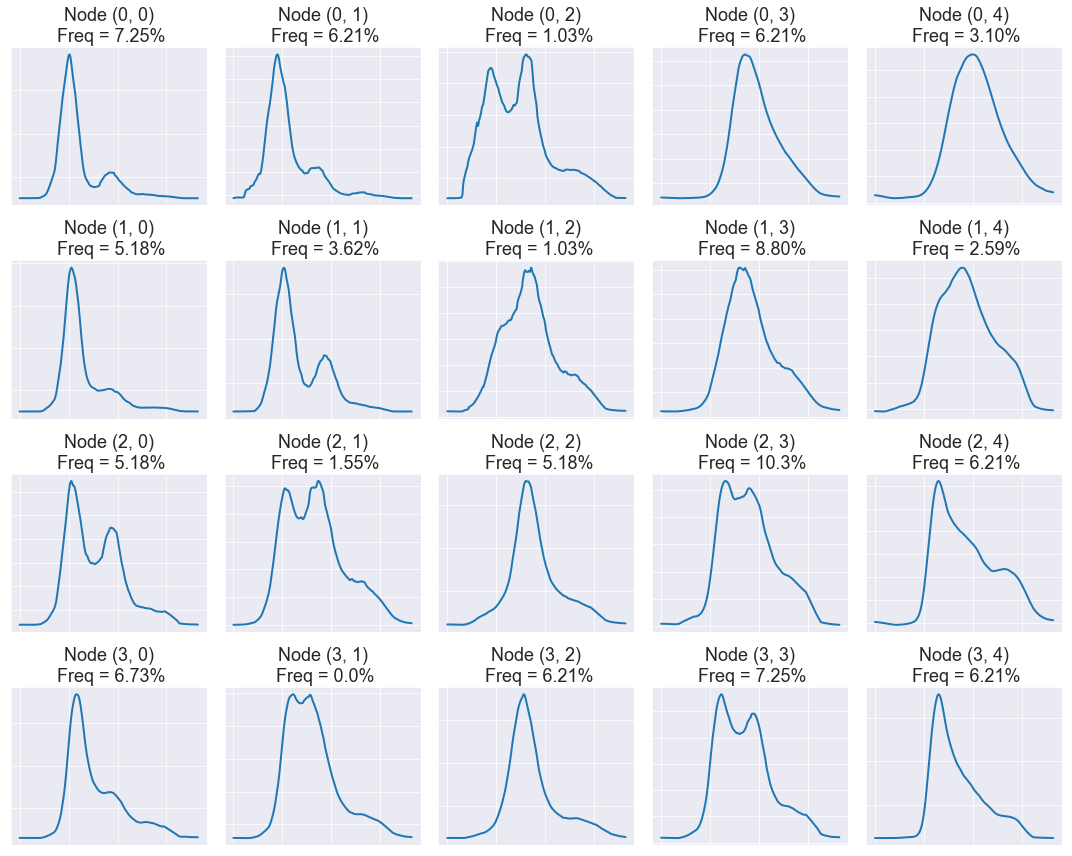

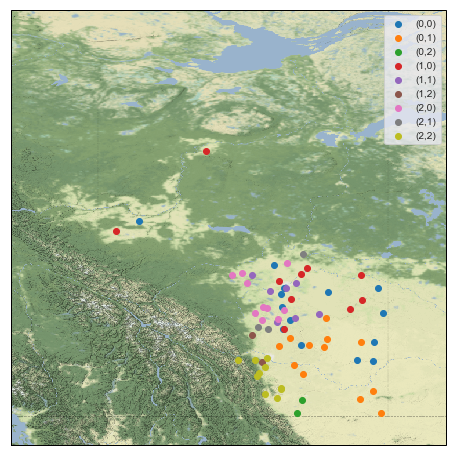

In [16]:
prob2 = pd.read_csv('data_problem2.csv')

#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 5
ny = 4

data = prob2.to_numpy()

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*ny + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

#visualize
plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy], linewidth = 2)
    plt.title('Node ' + str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%', fontsize = 18)
    plt.tick_params(labelbottom = False, labelleft = False)
    
plt.tight_layout()


#My map plots###########################
lats = pd.read_csv('stationLat.csv')
lons = pd.read_csv('stationLon.csv')
lats = lats.to_numpy()
lons = lons.to_numpy()

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
i = 0

for bmu in bmus:
    if bmu[1] == 0 and bmu[0] == 0:
        cluster1.append([lons[i],lats[i]])
    elif bmu[1] == 0 and bmu[0] == 1:
        cluster2.append([lons[i],lats[i]])
    elif bmu[1] == 0 and bmu[0] == 2:
        cluster3.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 0:
        cluster4.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 1:
        cluster5.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 2:
        cluster6.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 0:
        cluster7.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 1:
        cluster8.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 2:
        cluster9.append([lons[i],lats[i]])
    i = i + 1

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)
cluster7 = np.array(cluster7)
cluster8 = np.array(cluster8)
cluster9 = np.array(cluster9)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
fig.add_axes(ax)

tiler = Stamen('terrain-background')
ax.add_image(tiler, 7)

ax.set_extent([-123, -108, 48, 63], crs=ccrs.PlateCarree())

ax.scatter(cluster1[:,0],cluster1[:,1],transform = ccrs.PlateCarree(), label = "(0,0)")
ax.scatter(cluster2[:,0],cluster2[:,1],transform = ccrs.PlateCarree(), label = "(0,1)")
ax.scatter(cluster3[:,0],cluster3[:,1],transform = ccrs.PlateCarree(), label = "(0,2)")
ax.scatter(cluster4[:,0],cluster4[:,1],transform = ccrs.PlateCarree(), label = "(1,0)")
ax.scatter(cluster5[:,0],cluster5[:,1],transform = ccrs.PlateCarree(), label = "(1,1)")
ax.scatter(cluster6[:,0],cluster6[:,1],transform = ccrs.PlateCarree(), label = "(1,2)")
ax.scatter(cluster7[:,0],cluster7[:,1],transform = ccrs.PlateCarree(), label = "(2,0)")
ax.scatter(cluster8[:,0],cluster8[:,1],transform = ccrs.PlateCarree(), label = "(2,1)")
ax.scatter(cluster9[:,0],cluster9[:,1],transform = ccrs.PlateCarree(), label = "(2,2)")

ax.legend()

## Create 5 by 4 SOM and map - outline

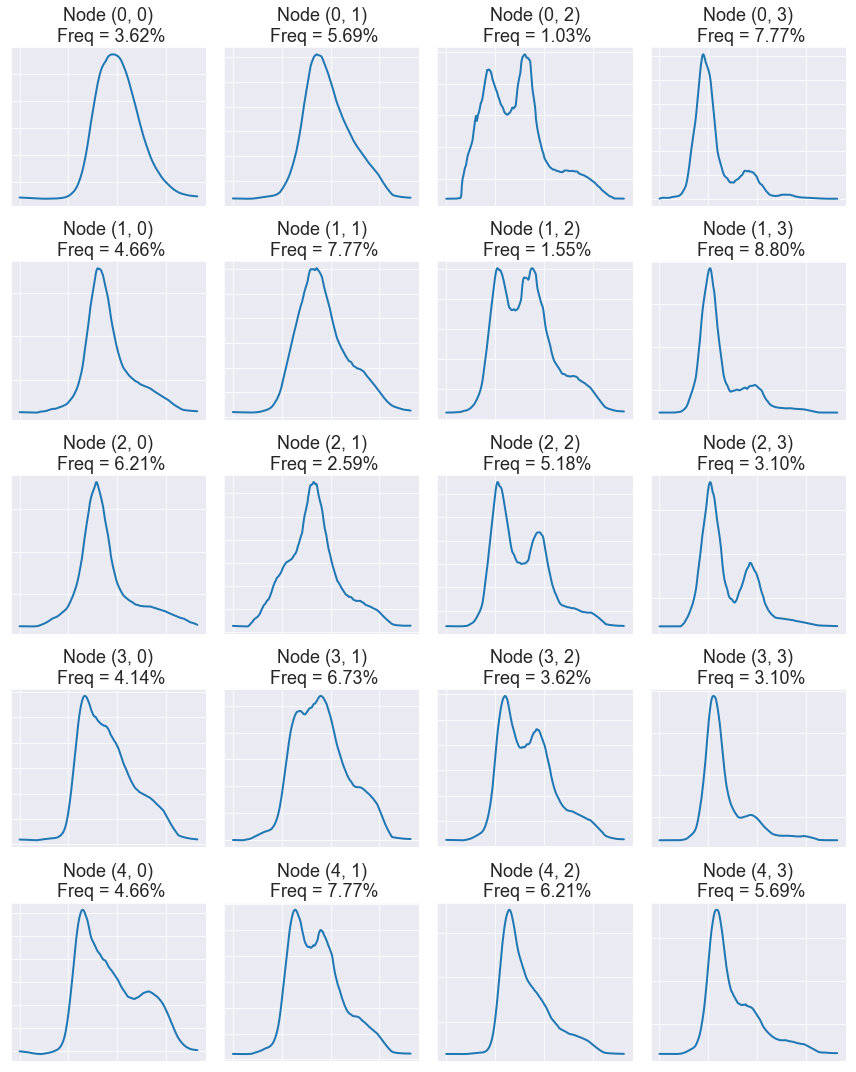

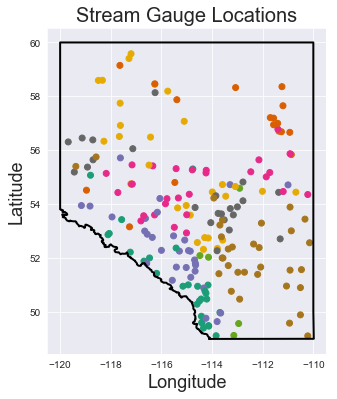

In [17]:
prob2 = pd.read_csv('data_problem2.csv')

#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 4
ny = 5

data = prob2.to_numpy()

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*ny + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

#visualize
plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy], linewidth = 2)
    plt.title('Node ' + str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%', fontsize = 18)
    plt.tick_params(labelbottom = False, labelleft = False)
    
plt.tight_layout()


B=np.reshape(bmus_num,(193,1))
plt.figure(figsize = (5,6))
plt.plot(ABlon, ABlat, color = 'k', linewidth = 2)
plt.scatter(stationLon,stationLat,c=B,cmap='Dark2')
plt.title('Stream Gauge Locations', fontsize = 20)
plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude', fontsize = 18)
plt.show()

## All clusters observed

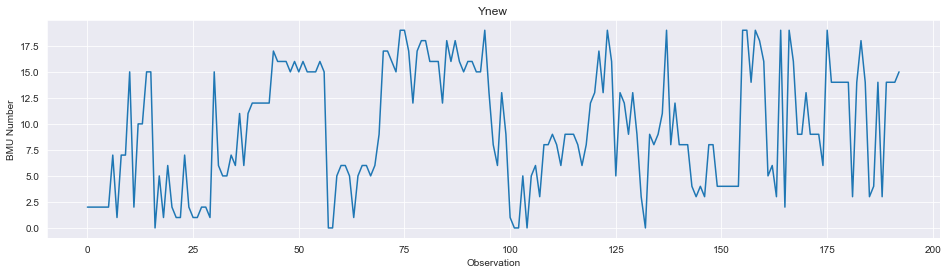

In [18]:
plt.figure(figsize=(16,4))
plt.plot(bmus_num)
plt.xlabel('Observation')
plt.ylabel('BMU Number')
plt.title('Ynew')
plt.show()

## QE and TE calculated for different map sizes

In [19]:
nxs = [2,2,3,3,4,4,5,5]
nys = [1,2,2,3,3,4,4,5]
QEs=[]
TEs=[]
for i in range(len(nys)):
    data = df2.to_numpy()

    #make, initialize, and train the SOM
    som = MiniSom(nxs[i], nys[i], len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
    som.pca_weights_init(data)
    som.train_random(data, 1000) # trains the SOM

    QE = som.quantization_error(data) #quantization error of map
    TE = som.topographic_error(data) #topographic error of map

    QEs.append(round(QE,3))
    TEs.append(round(TE,3))
    
soms=['1x2', '2x2', '2x3', '3x3', '3x4', '4x4', '4x5', '5x5']
zippedlist =  list(zip(soms, QEs, TEs))
output= pd.DataFrame(zippedlist,columns=['SOMs','QEs','TEs'])
display(HTML(output.to_html(index=False)))



SOMs,QEs,TEs
1x2,0.157,0.000
2x2,0.094,0.000
2x3,0.064,0.000
3x3,0.051,0.062
3x4,0.041,0.166
4x4,0.033,0.145
4x5,0.028,0.067
5x5,0.024,0.171


In [20]:
nxs = [1,2,2,3,1,3,4,4,5]
nys = [2,1,3,2,6,4,3,5,4]
QEs=[]
TEs=[]
for i in range(len(nys)):
    data = df2.to_numpy()

    #make, initialize, and train the SOM
    som = MiniSom(nxs[i], nys[i], len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
    som.pca_weights_init(data)
    som.train_random(data, 1000) # trains the SOM

    QE = som.quantization_error(data) #quantization error of map
    TE = som.topographic_error(data) #topographic error of map

    QEs.append(round(QE,3))
    TEs.append(round(TE,3))
    
soms=['1x2','2x1','2x3','3x2','1x6','3x4','4x3','4x5','5x4']
zippedlist =  list(zip(soms, QEs, TEs))
output= pd.DataFrame(zippedlist,columns=['SOMs','QEs','TEs'])
display(HTML(output.to_html(index=False)))


SOMs,QEs,TEs
1x2,0.149,0.000
2x1,0.149,0.000
2x3,0.062,0.005
3x2,0.068,0.000
1x6,0.068,0.176
3x4,0.040,0.083
4x3,0.040,0.000
4x5,0.026,0.036
5x4,0.026,0.041
